In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *


In [3]:
def add_five(x):
    return x + 5

In [4]:
y = add_five(3)

8

In [5]:
add_five(5)

10

In [6]:
add_five(3)
add_five(5)

10

In [7]:
y1 = add_five(3)
y2 = add_five(5)

print(y1, y2)

8 10


In [8]:
# Solution goes here
make_state = State(onlin = 10, wellesley = 2)
make_state

,values
onlin,10
wellesley,2


In [9]:
# Solution goes here
init = make_state

,values
onlin,10
wellesley,2


In [10]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')

In [11]:
def run_simulation(p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)
                    
    for i in range(num_steps):
        step(state, p1, p2)
        
    return state

In [12]:
state = run_simulation(0.4, 0.2, 60)

,values
olin,1
wellesley,11
olin_empty,3
wellesley_empty,0


In [13]:
state.olin_empty

3

In [14]:
state = run_simulation(0.2, 0.2, 60)
state.olin_empty

0

In [15]:
state = run_simulation(0.6, 0.2, 60)
state.olin_empty

17

In [16]:
p1_array = linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [17]:
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


In [18]:
help(linspace)

Help on function linspace in module modsim.modsim:

linspace(start, stop, num=50, **options)
    Returns an array of evenly-spaced values in the interval [start, stop].
    
    start: first value
    stop: last value
    num: number of values
    
    Also accepts the same keyword arguments as np.linspace.  See
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    
    returns: array or Quantity



In [19]:
# Solution goes here

solution_1 = linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [20]:
help(linrange)

Help on function linrange in module modsim.modsim:

linrange(start=0, stop=None, step=1, endpoint=False, **options)
    Returns an array of evenly-spaced values in an interval.
    
    By default, the last value in the array is `stop-step`
    (at least approximately).
    If you provide the keyword argument `endpoint=True`,
    the last value in the array is `stop`.
    
    This function works best if the space between start and stop
    is divisible by step; otherwise the results might be surprising.
    
    start: first value
    stop: last value
    step: space between values
    
    returns: NumPy array



In [21]:
# Solution goes here
linrange(1, 11, step = 2)

array([1, 3, 5, 7, 9], dtype=int32)

In [22]:
p2 = 0.2
num_steps = 60
p1_array = linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [23]:
for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    print(p1, state.olin_empty)

0.0 0
0.1 0
0.2 0
0.30000000000000004 2
0.4 9
0.5 1
0.6000000000000001 14
0.7000000000000001 13
0.8 19
0.9 29
1.0 38


In [24]:
sweep = SweepSeries()

for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    sweep[p1] = state.olin_empty

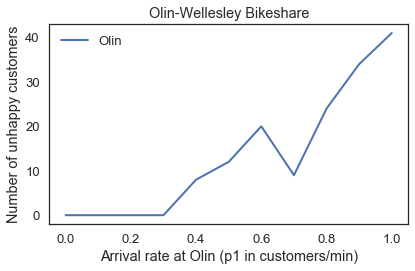

In [25]:

plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

In [26]:
# Solution goes here
def sweep_p1(p1_array):
    p2 = 0.2
    num_steps = 60
    sweep = SweepSeries()
    
    for p1 in p1_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p1] = state.olin_empty
    
    return sweep


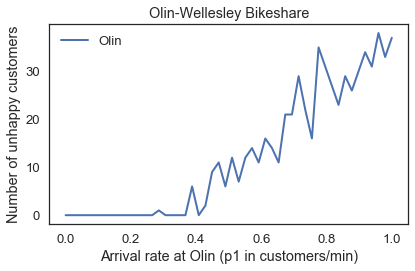

In [27]:
# Solution goes here
p1_array = linspace(0,1, 50)
sweep = sweep_p1(p1_array)

plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')


In [29]:
# Solution goes here
def sweep_p2(p2_array):
    p1 = 0.5
    num_steps = 60
    sweep = SweepSeries()
    
    for p2 in p2_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p2] = state.olin_empty
    
    return sweep    
    

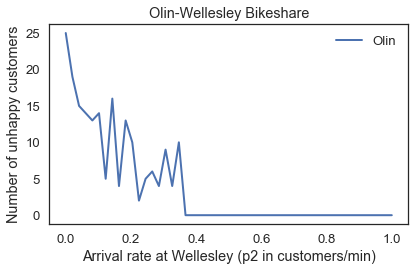

In [30]:
# Solution goes here
p2_array = linspace(0,1, 50)
sweep = sweep_p2(p2_array)

plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Wellesley (p2 in customers/min)', 
         ylabel='Number of unhappy customers')


In [31]:
def run_multiple_simulations(p1, p2, num_steps, num_runs):
    results = TimeSeries()
    
    for i in range(num_runs):
        state = run_simulation(p1, p2, num_steps)
        results[i] = state.olin_empty + state.wellesley_empty
        
    return results

In [32]:
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
run_multiple_simulations(p1, p2, num_steps, num_runs)

,values
0,5
1,0
2,0
3,4
4,0
5,1
6,7
7,1
8,0
9,0


In [34]:
p1_array = linspace(0, 1, 20)
p2 = 0.3
num_steps = 60
num_runs = 20


20

In [40]:
sweep = SweepSeries()
for p1 in p1_array:
    results = run_multiple_simulations(p1, p2, num_steps, num_runs)
    sweep[p1] = results.mean()

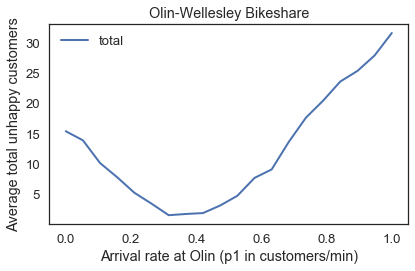

In [41]:
plot(sweep, label='total')
    
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Average total unhappy customers')